# Fake news detection

In [34]:
import pandas as pd
import re
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\nzen4


In [35]:
data = pd.read_csv('news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [37]:
data = data.drop('Unnamed: 0', axis = 1)
data

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [38]:
data['label'] = data['label'].str.lower()
data

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",fake
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,fake
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,real
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",fake
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,real
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,real
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,fake
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,fake
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",real


In [39]:
data = data.rename(columns={'label':'target'})
data

,title,text,target
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",fake
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,fake
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,real
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",fake
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,real
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,real
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,fake
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,fake
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",real


In [40]:
data['target'].value_counts()

target
real    3171
fake    3164
Name: count, dtype: int64

In [41]:
filter_data_real = data[data['target'] == 'real']
filter_data_real.head()

,title,text,target
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,real
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,real
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,real
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,real
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,real


In [42]:
filter_data_real.to_csv('True.csv')

In [43]:
filter_data_fake = data[data['target'] == 'fake']
filter_data_fake.head()

,title,text,target
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",fake
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,fake
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",fake
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",fake
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",fake


In [44]:
filter_data_fake.to_csv('False.csv')

In [45]:
import os
print("Current Working Directory:", os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Current Working Directory: c:\Users\nzen4


## Read datasets

In [46]:
fake =  pd.read_csv(r"C:\Users\nzen4\False.csv")
fake

,Unnamed: 0,title,text,target
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",fake
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,fake
2,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",fake
3,5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",fake
4,6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",fake
...,...,...,...,...
3159,6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,fake
3160,6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,fake
3161,6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,fake
3162,6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,fake


In [47]:
fake = fake.drop(columns=['Unnamed: 0'])
fake

,title,text,target
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",fake
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,fake
2,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",fake
3,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",fake
4,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",fake
...,...,...,...
3159,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,fake
3160,Radio Derb Is On The Air–Leonardo And Brazil’s...,,fake
3161,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,fake
3162,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,fake


In [48]:
fake.columns

Index(['title', 'text', 'target'], dtype='object')

In [49]:
true = pd.read_csv("True.csv")
true

,Unnamed: 0,title,text,target
0,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,real
1,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,real
2,7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,real
3,8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,real
4,9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,real
...,...,...,...,...
3166,6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,real
3167,6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,real
3168,6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,real
3169,6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",real


In [50]:
true = true.drop(columns=['Unnamed: 0'])
true

,title,text,target
0,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,real
1,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,real
2,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,real
3,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,real
4,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,real
...,...,...,...
3166,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,real
3167,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,real
3168,State Department says it can't find emails fro...,The State Department told the Republican Natio...,real
3169,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",real


In [51]:
fake.shape

(3164, 3)

In [52]:
true.shape

(3171, 3)

## Data cleaning and preparation

In [53]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [54]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(6335, 3)

In [55]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [56]:
# Check the data
data.head()

,title,text,target
0,America’s Most Popular ‘Legal’ Drug is Respons...,Home / Health / America’s Most Popular ‘Legal’...,fake
1,Trump says GOP opposition to him 'taking advan...,Republican presidential front-runner Donald Tr...,true
2,The Globalization Of Media: A Failing Strike F...,By Jon Rappoport \nI begin this piece with thr...,fake
3,Why conservatives refuse to believe Obama is C...,The percentage selecting “Muslim” is notably h...,true
4,Is America On The Brink Of Civil War?,Is America On The Brink Of Civil War? 11/07/20...,fake


In [57]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,target
0,Home / Health / America’s Most Popular ‘Legal’...,fake
1,Republican presidential front-runner Donald Tr...,true
2,By Jon Rappoport \nI begin this piece with thr...,fake
3,The percentage selecting “Muslim” is notably h...,true
4,Is America On The Brink Of Civil War? 11/07/20...,fake


In [58]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,target
0,home / health / america’s most popular ‘legal’...,fake
1,republican presidential front-runner donald tr...,true
2,by jon rappoport \ni begin this piece with thr...,fake
3,the percentage selecting “muslim” is notably h...,true
4,is america on the brink of civil war? 11/07/20...,fake


In [59]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [60]:
# Check
data.head()

,text,target
0,home health america’s most popular ‘legal’ d...,fake
1,republican presidential frontrunner donald tru...,true
2,by jon rappoport \ni begin this piece with thr...,fake
3,the percentage selecting “muslim” is notably h...,true
4,is america on the brink of civil war 11072016 ...,fake


In [61]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nzen4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
data.head()

,text,target
0,home health america’s popular ‘legal’ drug res...,fake
1,republican presidential frontrunner donald tru...,true
2,jon rappoport begin piece three quotes workinp...,fake
3,percentage selecting “muslim” notably higher p...,true
4,america brink civil war 11072016 pj media vale...,fake


## Basic data exploration

target
fake    3164
true    3171
Name: text, dtype: int64


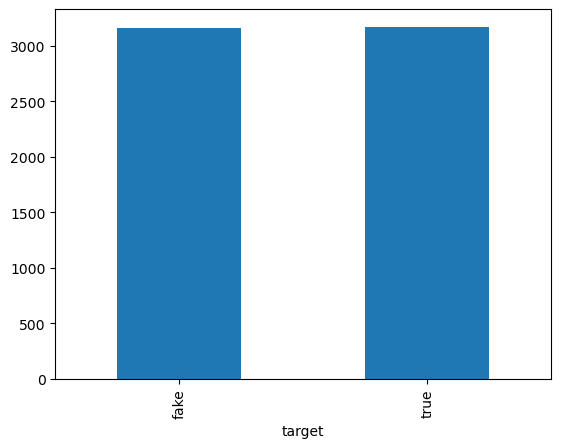

In [63]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [64]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


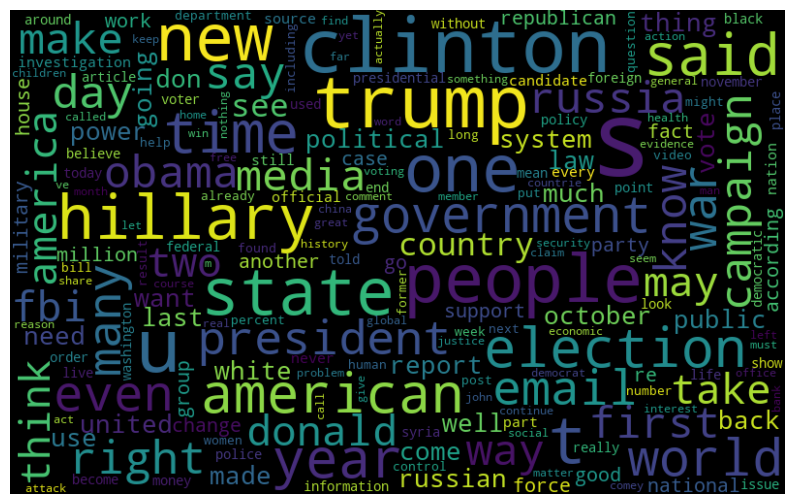

In [65]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

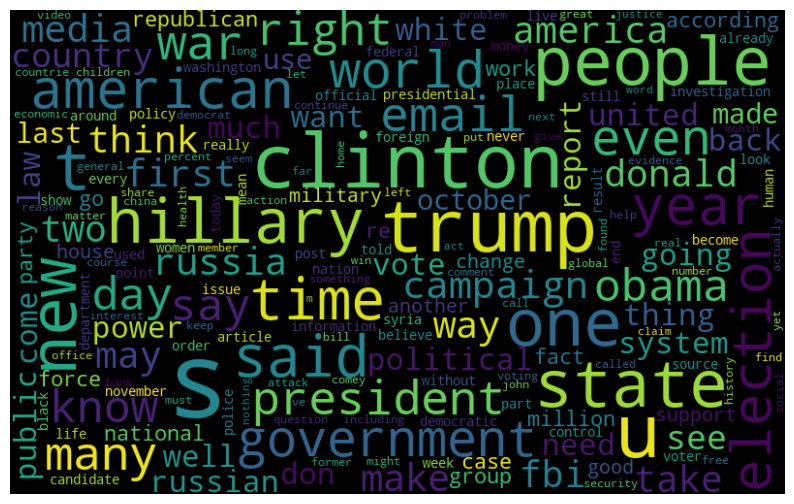

In [66]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

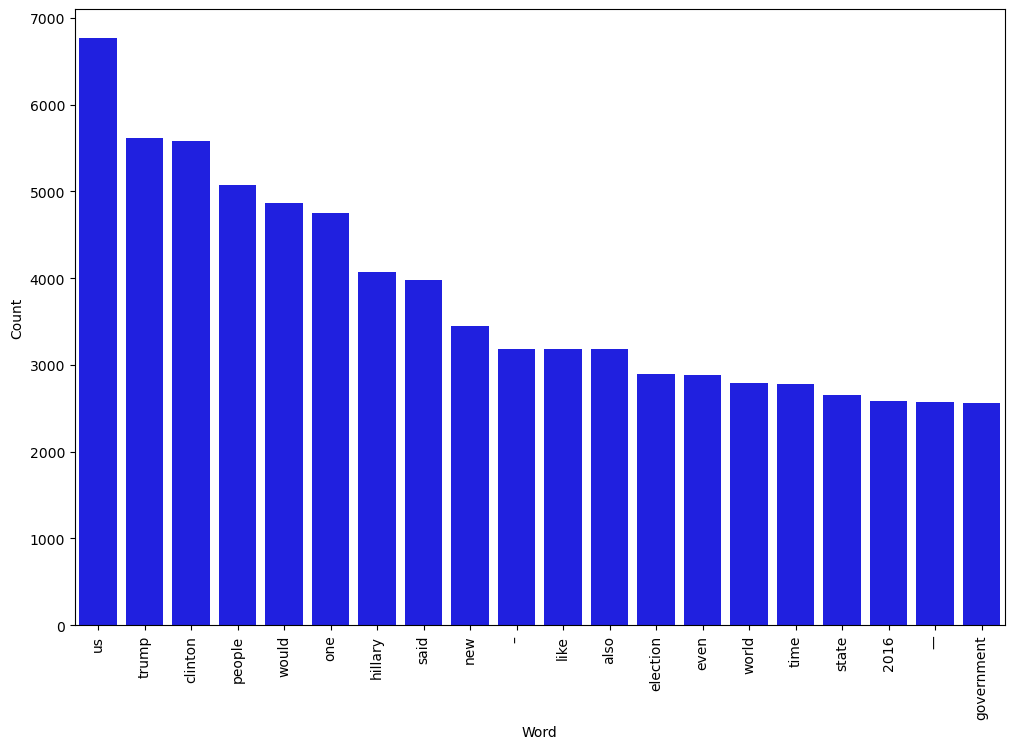

In [68]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

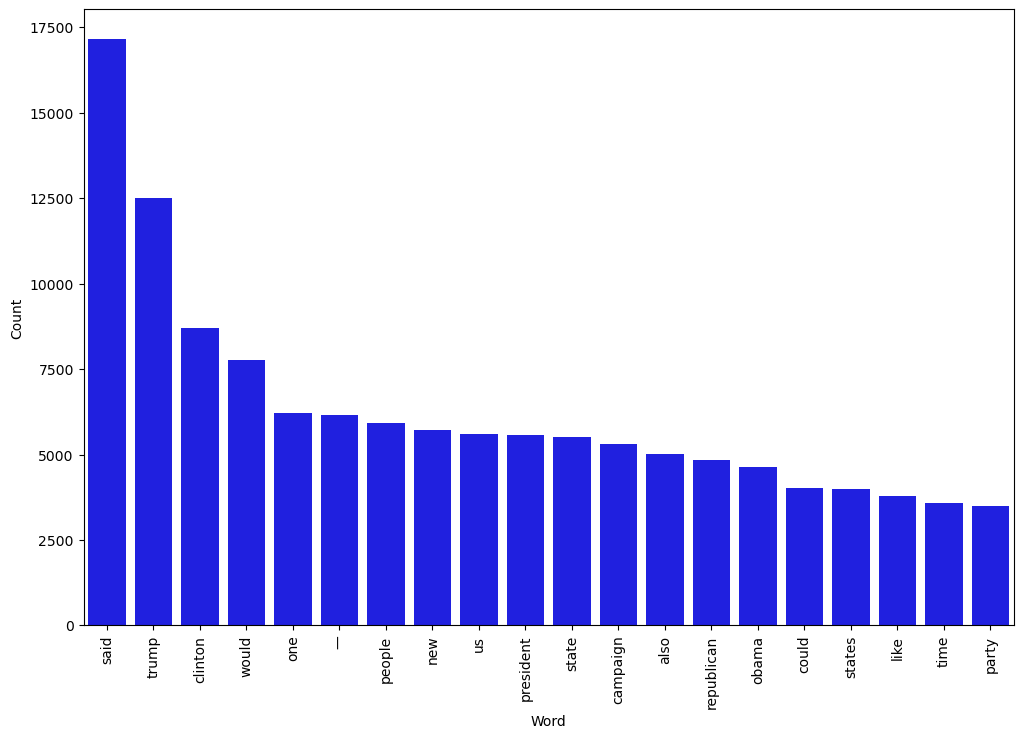

In [69]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [70]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [71]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### Logistic regression

In [72]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 90.45%


Confusion matrix, without normalization


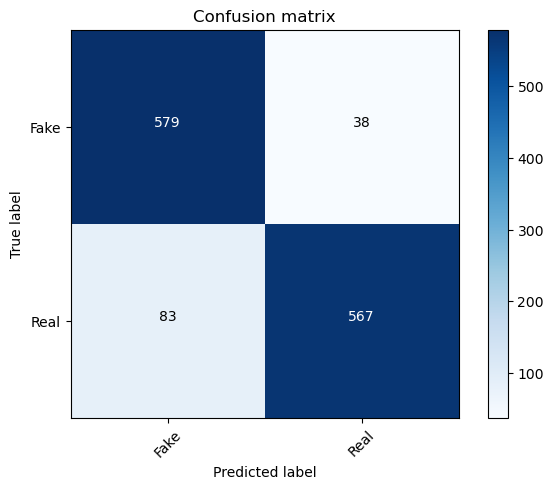

In [73]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 79.48%


Confusion matrix, without normalization


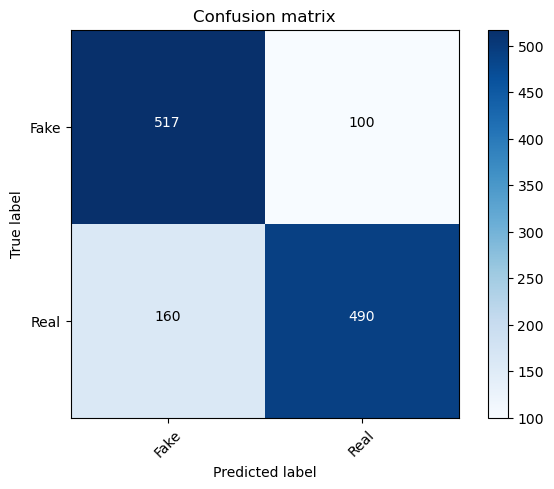

In [75]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 89.98%


Confusion matrix, without normalization


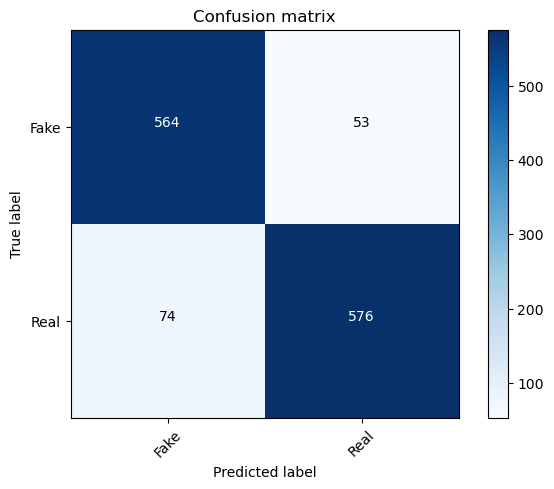

In [77]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])